Result obtained from SVM

Vegetation indices


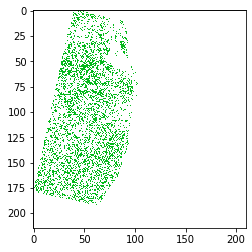


Water Indices


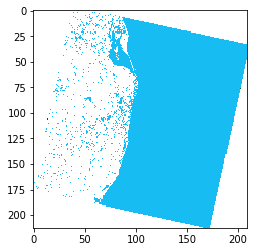


Building indices


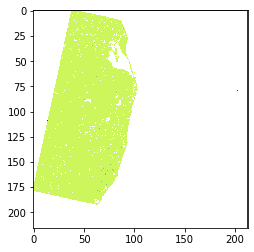


Accuracy of SVM is 58.7252154%


In [5]:
#import rasterio to process tif images
import rasterio
import rasterio.plot
import pyproj
import numpy as np

#import matplotlib is display the output file
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import accuracy score to get accuracy percentage 
from sklearn.metrics import accuracy_score

#importing pandas to read csv
import pandas as pd


#importing svc to create model for support vector machine to train and test data
from sklearn.svm import SVC

"""
pandas to read from training data and segregate them into x and y for training model 
as y is the labeled information because it is supervised learning
"""

data = pd.read_csv('spectral123.csv')
X = data.drop(['predict'], axis=1)
X = X.dropna(axis='columns')
y = data['predict']

#here svm_model is the model for svm

clf = SVC(kernel='linear') 
clf.fit(X, y)
svm_model=clf


#read the input dataset(eg: chennai area) and kept in a variable 

redband = 'RED_IMAGE.tif'
nirband = 'NIR_IMAGE.tif'
blueband='BLUE_IMAGE.tif'
swirband = 'SWIR_IMAGE.tif'
greenband = 'GREEN_IMAGE.tif'

"""
Rasterio reads raster data into numpy arrays so plotting a single band
as two dimensional data can be accomplished directly with pyplot.
"""

with rasterio.open(redband) as src:
    red=src.read(1)
with rasterio.open(nirband) as src:
    nir = src.read(1)
with rasterio.open(blueband) as src:
    blue = src.read(1)
with rasterio.open(swirband) as src:
    blue = src.read(1)
with rasterio.open(greenband) as src:
    blue = src.read(1)
    

#below are the seperate function for calculating vegetation indices

def calc_ndvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi =  ((nir- red) / (nir + red)).astype(np.float32)
    return ndvi


def calc_dvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    dvi =(nir- red)
    return dvi

def calc_mndwi(green,swir):
    green = green.astype('f4')
    swir = swir.astype('f4')
    mndwi =  (green- swir) / (green + swir)
    return mndwi

def calc_evi(nir,red,blue):
    nir = nir.astype('f4')
    red = red.astype('f4')
    blue = blue.astype('f4')
    numerator = nir-red
    c1 = red
    c2 = blue
    c1 = c1+nir
    denominator = c1-c2
    result = numerator/denominator
    result = result
    return result

def calc_ndmi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndmi =  (red- nir)/(red+nir)
    return ndmi

def calc_ndwi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndwi =  (nir- swir)/(nir+swir)
    return ndwi

def calc_ndbi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndbi =  (swir-nir)/(nir+swir)
    return ndbi


def calc_savi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    savi =  ((nir- red) / (nir + red+0.5))*1.5
    return savi

#below are the function to calculate ndvi,evi,... 

ndvi=calc_ndvi(nir,red)
evi=calc_evi(nir,red,blue)
dvi=calc_dvi(nir,red)
mndwi=calc_mndwi(green,swir)
ndwi=calc_ndwi(nir,swir)
ndbi=calc_ndbi(nir,swir)
savi=calc_savi(nir,red)
ndmi=calc_ndmi(nir,red)


ndvisd=stdev(ndvi)
evisd=stdev(evi)
dvisd=stdev(dvi)
mndwisd=stdev(mndwi)
ndwisd=stdev(ndwi)
ndbisd=stdev(ndbi)
savisd=stdev(savi)
ndmisd=stdev(ndmi)

#vegetation_array[] is to keep track of vegetation area from input dataset
vegetation_array = [[0]*7641]*7791

#built_array[] is to keep track of building area from input dataset
builtup_array= [[0]*7641]*7791

#water_array[] is to keep track of water area from input dataset
water_array = [[0]*7641]*7791

svm_acc=0

for i in range 7791:
""""
data[] is used to append indices infromation(results of ndvi,dvi..  and ndvisd,dvisd )
from input tif image for every index(each rows and columns of input tif represent each index) and it
used as testing data 
"""
    data=[]
    for j in range 7641:
        data.append(ndvi[i][j])
        data.append(evi[i][j])
        data.append(dvi[i][j])
        data.append(mndwi[i][j])
        data.append(ndwi[i][j])
        data.append(ndbi[i][j])
        data.append(savi[i][j])
        data.append(ndmi[i][j])
        data.append(ndvisd[i][j])
        data.append(evisd[i][j])
        data.append(dvisd[i][j])
        data.append(mndwisd[i][j])
        data.append(ndwisd[i][j])
        data.append(ndbisd[i][j])
        data.append(savisd[i][j])
        data.append(ndmisd[i][j])
"""
each index is subjected to ndvi,dvi,... and ndvisd,dvisd,... and store it
in data[] which is identified as water or building or vegetation by using 
already created svm model

if the index was vegetation, indices corresponds to 
vegetation is taken(ndvi,dvi,evi because all three corresponds to vegetation)
and stored it in vegetation array and so on for other two
"""
        if(svm.predict(data)=='v'):
            average_val=ndvi[i][j]+dvi[i][j]+evi[i][j]
            average_val/=3
            vegetation_array[i][j]=average_val
            
        if(svm.predict(data)=='b'):
            average_val=ndbi[i][j]+savi[i][j]+ndmi[i][j]
            average_val/=3
            builtup_array[i][j]=average_val
            
        if(svm.predict(data)=='w'):
            average_val=ndwi[i][j]+mndwi[i][j]
            average_val/=2
            water_array[i][j]=average_val
        
         svm_acc+=accuracy_score(svm.predict(data))
            
svm_acc=svm_acc/(7791+7641)

print("Result Obtained from SVM")

#showing corresponding array displays corresponding areas

plt.imshow(vegetation_array)
plt.colorbar()
plt.show()
           
           
plt.imshow(water_array)
plt.colorbar()
plt.show()
           
plt.imshow(builtup_array)
plt.colorbar()
plt.show()
           
print("Accuracy of SVM is "+svm_acc)

Result obtained from Random Forest Regression

Vegetation indices


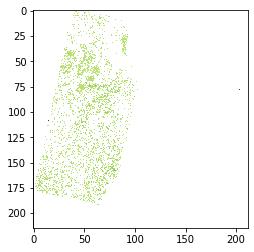


Water Indices


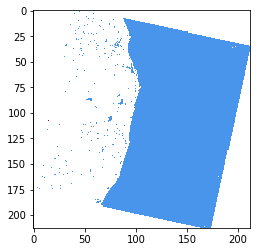


Building indices


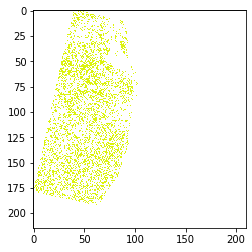


Accuracy of Random Forest is 59.3334556%


In [7]:
#import rasterio to process tif images
import rasterio
import rasterio.plot
import pyproj
import numpy as np

#import matplotlib is display the output file
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import accuracy score to get accuracy percentage 
from sklearn.metrics import accuracy_score

#importing pandas to read csv
import pandas as pd


#importing randomforestregressor to create model for random forest to train and test data
from sklearn.ensemble import RandomForestRegressor

"""
pandas to read from training data and segregate them into x and y for training model 
as y is the labeled information because it is supervised learning
"""
data = pd.read_csv('spectral123.csv')
X = data.drop(['predict'], axis=1)
X = X.dropna(axis='columns')
y = data['predict']

#here rf_model is the model for rf

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x, y)
rf_model=regressor


#read the input dataset(eg: chennai area) and kept in a variable 

redband = 'RED_IMAGE.tif'
nirband = 'NIR_IMAGE.tif'
blueband='BLUE_IMAGE.tif'
swirband = 'SWIR_IMAGE.tif'
greenband = 'GREEN_IMAGE.tif'

"""
Rasterio reads raster data into numpy arrays so plotting a single band
as two dimensional data can be accomplished directly with pyplot.
"""

with rasterio.open(redband) as src:
    red=src.read(1)
with rasterio.open(nirband) as src:
    nir = src.read(1)
with rasterio.open(blueband) as src:
    blue = src.read(1)
with rasterio.open(swirband) as src:
    blue = src.read(1)
with rasterio.open(greenband) as src:
    blue = src.read(1)
    

#below are the seperate function for calculating vegetation indices

def calc_ndvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi =  ((nir- red) / (nir + red)).astype(np.float32)
    return ndvi


def calc_dvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    dvi =(nir- red)
    return dvi

def calc_mndwi(green,swir):
    green = green.astype('f4')
    swir = swir.astype('f4')
    mndwi =  (green- swir) / (green + swir)
    return mndwi

def calc_evi(nir,red,blue):
    nir = nir.astype('f4')
    red = red.astype('f4')
    blue = blue.astype('f4')
    numerator = nir-red
    c1 = red
    c2 = blue
    c1 = c1+nir
    denominator = c1-c2
    result = numerator/denominator
    result = result
    return result

def calc_ndmi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndmi =  (red- nir)/(red+nir)
    return ndmi

def calc_ndwi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndwi =  (nir- swir)/(nir+swir)
    return ndwi

def calc_ndbi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndbi =  (swir-nir)/(nir+swir)
    return ndbi


def calc_savi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    savi =  ((nir- red) / (nir + red+0.5))*1.5
    return savi

#below are the function to calculate ndvi,evi,... 

ndvi=calc_ndvi(nir,red)
evi=calc_evi(nir,red,blue)
dvi=calc_dvi(nir,red)
mndwi=calc_mndwi(green,swir)
ndwi=calc_ndwi(nir,swir)
ndbi=calc_ndbi(nir,swir)
savi=calc_savi(nir,red)
ndmi=calc_ndmi(nir,red)


ndvisd=stdev(ndvi)
evisd=stdev(evi)
dvisd=stdev(dvi)
mndwisd=stdev(mndwi)
ndwisd=stdev(ndwi)
ndbisd=stdev(ndbi)
savisd=stdev(savi)
ndmisd=stdev(ndmi)

#vegetation_array[] is to keep track of vegetation area from input dataset
vegetation_array = [[0]*7641]*7791

#built_array[] is to keep track of building area from input dataset
builtup_array= [[0]*7641]*7791

#water_array[] is to keep track of water area from input dataset
water_array = [[0]*7641]*7791

rf_acc=0

for i in range 7791:
""""
data[] is used to append indices infromation(results of ndvi,dvi..  and ndvisd,dvisd )
from input tif image for every index(each rows and columns of input tif represent each index) and it
used as testing data 
"""
    data=[]
    for j in range 7641:
        data.append(ndvi[i][j])
        data.append(evi[i][j])
        data.append(dvi[i][j])
        data.append(mndwi[i][j])
        data.append(ndwi[i][j])
        data.append(ndbi[i][j])
        data.append(savi[i][j])
        data.append(ndmi[i][j])
        data.append(ndvisd[i][j])
        data.append(evisd[i][j])
        data.append(dvisd[i][j])
        data.append(mndwisd[i][j])
        data.append(ndwisd[i][j])
        data.append(ndbisd[i][j])
        data.append(savisd[i][j])
        data.append(ndmisd[i][j])
"""
each index is subjected to ndvi,dvi,... and ndvisd,dvisd,... and store it
in data[] which is identified as water or building or vegetation by using 
already created rf model

if the index was vegetation, indices corresponds to 
vegetation is taken(ndvi,dvi,evi because all three corresponds to vegetation)
and stored it in vegetation array and so on for other two
"""
        if(rf_model.predict(data)=='v'):
            average_val=ndvi[i][j]+dvi[i][j]+evi[i][j]
            average_val/=3
            vegetation_array[i][j]=average_val
            
        if(rf_model.predict(data)=='b'):
            average_val=ndbi[i][j]+savi[i][j]+ndmi[i][j]
            average_val/=3
            builtup_array[i][j]=average_val
            
        if(rf_model.predict(data)=='w'):
            average_val=ndwi[i][j]+mndwi[i][j]
            average_val/=2
            water_array[i][j]=average_val
        
         rf_acc+=accuracy_score(ensemble.predict(data))
            
rf_acc=rf_acc/(7791+7641)

print("Result Obtained from Random Forest Regression")

           
plt.imshow(vegetation_array)
plt.colorbar()
plt.show()
           
           
plt.imshow(water_array)
plt.colorbar()
plt.show()
           
plt.imshow(builtup_arr)
plt.colorbar()
plt.show()
           
print("Accuracy of Random Forest is "+rf_acc)

In [ ]:
"""
H2O’s automl Stacked Ensemble method is a supervised ensemble machine learning algorithm 
that finds the optimal combination of a collection of prediction algorithms using a process called stacking. 
like all supervised models in H2O, svm.rf etc...
"""

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.svm import H2OSVMEstimator
from h2o.automl.estimators.stackedensemble import H2OAutoMLStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function

#import rasterio to process tif images
import rasterio
import rasterio.plot
import pyproj
import numpy as np

#import matplotlib is display the output file
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import accuracy score to get accuracy percentage 
from sklearn.metrics import accuracy_score

h2o.init()
h2o.automl.init()

"""
pandas to read from training data and segregate them into x and y for training model 
as y is the labeled information because it is supervised learning
"""
data = pd.read_csv('spectral123.csv')
X = data.drop(['predict'], axis=1)
X = X.dropna(axis='columns')
y = data['predict']


#Training a htosvm
my_svm = H2OSVMEstimator( nfolds=nfolds,
                         fold_assignment="Modulo",
                         keep_cross_validation_predictions=True,
                         seed=1)
my_svm.train(x=X, y=y, training_frame=data)


# Training a htorf
my_rf = H2ORandomForestEstimator(nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=X, y=y, training_frame=data)

#here is the model for automl classification
ensemble = H2OAutoMLStackedEnsembleEstimator(model_id="sample",
                                       base_models=[my_svm, my_rf])
ensemble.train(x=X, y=y, training_frame=data)



#read the input dataset(eg: chennai area) and kept in a variable 

redband = 'RED_IMAGE.tif'
nirband = 'NIR_IMAGE.tif'
blueband='BLUE_IMAGE.tif'
swirband = 'SWIR_IMAGE.tif'
greenband = 'GREEN_IMAGE.tif'

"""
Rasterio reads raster data into numpy arrays so plotting a single band
as two dimensional data can be accomplished directly with pyplot.
"""

with rasterio.open(redband) as src:
    red=src.read(1)
with rasterio.open(nirband) as src:
    nir = src.read(1)
with rasterio.open(blueband) as src:
    blue = src.read(1)
with rasterio.open(swirband) as src:
    blue = src.read(1)
with rasterio.open(greenband) as src:
    blue = src.read(1)
    

#below are the seperate function for calculating vegetation indices

def calc_ndvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi =  ((nir- red) / (nir + red)).astype(np.float32)
    return ndvi


def calc_dvi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    dvi =(nir- red)
    return dvi

def calc_mndwi(green,swir):
    green = green.astype('f4')
    swir = swir.astype('f4')
    mndwi =  (green- swir) / (green + swir)
    return mndwi

def calc_evi(nir,red,blue):
    nir = nir.astype('f4')
    red = red.astype('f4')
    blue = blue.astype('f4')
    numerator = nir-red
    c1 = red
    c2 = blue
    c1 = c1+nir
    denominator = c1-c2
    result = numerator/denominator
    result = result
    return result

def calc_ndmi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndmi =  (red- nir)/(red+nir)
    return ndmi

def calc_ndwi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndwi =  (nir- swir)/(nir+swir)
    return ndwi

def calc_ndbi(nir,swir):
    nir = nir.astype('f4')
    swir = swir.astype('f4')
    ndbi =  (swir-nir)/(nir+swir)
    return ndbi


def calc_savi(nir,red):
    nir = nir.astype('f4')
    red = red.astype('f4')
    savi =  ((nir- red) / (nir + red+0.5))*1.5
    return savi

#below are the function to calculate ndvi,evi,... 

ndvi=calc_ndvi(nir,red)
evi=calc_evi(nir,red,blue)
dvi=calc_dvi(nir,red)
mndwi=calc_mndwi(green,swir)
ndwi=calc_ndwi(nir,swir)
ndbi=calc_ndbi(nir,swir)
savi=calc_savi(nir,red)
ndmi=calc_ndmi(nir,red)


ndvisd=stdev(ndvi)
evisd=stdev(evi)
dvisd=stdev(dvi)
mndwisd=stdev(mndwi)
ndwisd=stdev(ndwi)
ndbisd=stdev(ndbi)
savisd=stdev(savi)
ndmisd=stdev(ndmi)

#vegetation_array[] is to keep track of vegetation area from input dataset
vegetation_array = [[0]*7641]*7791

#built_array[] is to keep track of building area from input dataset
builtup_array= [[0]*7641]*7791

#water_array[] is to keep track of water area from input dataset
water_array = [[0]*7641]*7791

automl_acc=0

for i in range 7791:
""""
data[] is used to append indices infromation(results of ndvi,dvi..  and ndvisd,dvisd )
from input tif image for every index(each rows and columns of input tif represent each index) and it
used as testing data 
"""
    data=[]
    for j in range 7641:
        data.append(ndvi[i][j])
        data.append(evi[i][j])
        data.append(dvi[i][j])
        data.append(mndwi[i][j])
        data.append(ndwi[i][j])
        data.append(ndbi[i][j])
        data.append(savi[i][j])
        data.append(ndmi[i][j])
        data.append(ndvisd[i][j])
        data.append(evisd[i][j])
        data.append(dvisd[i][j])
        data.append(mndwisd[i][j])
        data.append(ndwisd[i][j])
        data.append(ndbisd[i][j])
        data.append(savisd[i][j])
        data.append(ndmisd[i][j])
"""
each index is subjected to ndvi,dvi,... and ndvisd,dvisd,... and store it
in data[] which is identified as water or building or vegetation by using 
already created automl model

if the index was vegetation, indices corresponds to 
vegetation is taken(ndvi,dvi,evi because all three corresponds to vegetation)
and stored it in vegetation array and so on for other two
"""
        if(ensemble.predict(data)=='v'):
            average_val=ndvi[i][j]+dvi[i][j]+evi[i][j]
            average_val/=3
            vegetation_array[i][j]=average_val
            
        if(ensemble.predict(data)=='b'):
            average_val=ndbi[i][j]+savi[i][j]+ndmi[i][j]
            average_val/=3
            builtup_array[i][j]=average_val
            
        if(ensemble.predict(data)=='w'):
            average_val=ndwi[i][j]+mndwi[i][j]
            average_val/=2
            water_array[i][j]=average_val
        
         automl_acc+=accuracy_score(ensemble.predict(data))
            
automl_acc=automl_acc/(7791+7641)

print("Result Obtained from AutoML")

           
plt.imshow(vegetation_array)
plt.colorbar()
plt.show()
           
           
plt.imshow(water_array)
plt.colorbar()
plt.show()
           
plt.imshow(builtup_array)
plt.colorbar()
plt.show()
           
print("Accuracy of Automl is "+automl_acc)